# Exploratory Data Analysis on Kids Nightmare Patterns and Psychological Impact




# Data Preprocessing 

Importing Required Python Libraries

In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
from wordcloud import WordCloud

import warnings as wr
wr.filterwarnings('ignore')

sns.set_palette("Blues")

Import Dataset 

In [28]:
df = pd.read_csv("/Users/lakshmiramesh/Downloads/Personal Projects/EDA_children_nightmare_data_project/data/nightmare_dataset.csv")
df

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,Female,Weekly,Being Chased,Consistent sleep,No recent changes,Curtains blowing,Alone and Lost,28.0,0,0,1
1,10.0,Male,NaN,Darkness Fears,Consistent sleep,Academic pressure,Shared room,Animals attacking,12.0,1,0,1
2,NaN,Female,Weekly,Water Drowning,Irregular sleep,Started daycare,Window open,bedwetting,29.0,1,1,0
3,NaN,Male,Weekly,Scary Place Fear,Irregular sleep,Recent move to new house,NaN,Being Chased,17.0,1,1,1
4,10.0,Male,NaN,Unknown,Irregular sleep,Academic pressure,Creaking floor,Falling from Height,21.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,Female,Weekly,Falling from Height,Consistent sleep,No recent changes,Shared room,Scary Place Fear,NaN,0,0,1
19996,4.0,Male,Monthly,Parents Fights,Irregular sleep,No recent changes,Soft nightlight,Losing Body Parts,27.0,0,1,0
19997,NaN,Male,Bi-weekly,Darkness Fears,Consistent sleep,Parents' recent divorce,Ghostly figure,Parental Slap Fear,11.0,1,0,1
19998,6.0,Female,Weekly,Being Chased,Consistent sleep,Academic pressure,Shared room,Darkness Fears,NaN,1,0,1


Replace Binary Columns from 1/0 to "Yes" or "No" - Changes from a integer column to a object column 

In [29]:
binary_columns = ['Has Recent Life Changes', 'Irregular Sleep Pattern', 'Fear-Related Nightmare']
df[binary_columns] = df[binary_columns].replace({0: 'No', 1: 'Yes'})
df

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,Female,Weekly,Being Chased,Consistent sleep,No recent changes,Curtains blowing,Alone and Lost,28.0,No,No,Yes
1,10.0,Male,NaN,Darkness Fears,Consistent sleep,Academic pressure,Shared room,Animals attacking,12.0,Yes,No,Yes
2,NaN,Female,Weekly,Water Drowning,Irregular sleep,Started daycare,Window open,bedwetting,29.0,Yes,Yes,No
3,NaN,Male,Weekly,Scary Place Fear,Irregular sleep,Recent move to new house,NaN,Being Chased,17.0,Yes,Yes,Yes
4,10.0,Male,NaN,Unknown,Irregular sleep,Academic pressure,Creaking floor,Falling from Height,21.0,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,Female,Weekly,Falling from Height,Consistent sleep,No recent changes,Shared room,Scary Place Fear,NaN,No,No,Yes
19996,4.0,Male,Monthly,Parents Fights,Irregular sleep,No recent changes,Soft nightlight,Losing Body Parts,27.0,No,Yes,No
19997,NaN,Male,Bi-weekly,Darkness Fears,Consistent sleep,Parents' recent divorce,Ghostly figure,Parental Slap Fear,11.0,Yes,No,Yes
19998,6.0,Female,Weekly,Being Chased,Consistent sleep,Academic pressure,Shared room,Darkness Fears,NaN,Yes,No,Yes


In [30]:
df = df[df['Age'] <= 10]
df

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,Female,Weekly,Being Chased,Consistent sleep,No recent changes,Curtains blowing,Alone and Lost,28.0,No,No,Yes
1,10.0,Male,NaN,Darkness Fears,Consistent sleep,Academic pressure,Shared room,Animals attacking,12.0,Yes,No,Yes
4,10.0,Male,NaN,Unknown,Irregular sleep,Academic pressure,Creaking floor,Falling from Height,21.0,Yes,Yes,No
5,9.0,Female,Weekly,Water Drowning,Irregular sleep,NaN,Creaking floor,Trapped in Space,16.0,Yes,Yes,No
6,5.0,NaN,NaN,Dead or Dying,Consistent sleep,New sibling born,Abandoned toys,Parental Slap Fear,17.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,5.0,Male,Weekly,Falling from Height,Irregular sleep,Starting kindergarten,Abandoned toys,Trapped in Space,8.0,Yes,Yes,Yes
19994,7.0,Female,Monthly,Zombie Attack,Irregular sleep,Parents' recent divorce,Ghostly figure,School Test Failure,18.0,Yes,Yes,Yes
19996,4.0,Male,Monthly,Parents Fights,Irregular sleep,No recent changes,Soft nightlight,Losing Body Parts,27.0,No,Yes,No
19998,6.0,Female,Weekly,Being Chased,Consistent sleep,Academic pressure,Shared room,Darkness Fears,NaN,Yes,No,Yes


- Since this dataset is on nightmare patterns in children, I dropped any rows that have an age value greater than 10. Moving forward this data will analyze kids nightmare patterns between the ages 4-10.

Overview of the Dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17096 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               17096 non-null  float64
 1   Gender                            15388 non-null  object 
 2   Nightmare Frequency               15410 non-null  object 
 3   Nightmare Content                 17096 non-null  object 
 4   Sleep Patterns                    15431 non-null  object 
 5   Recent Life Changes               15374 non-null  object 
 6   Sleep Environment                 15412 non-null  object 
 7   Parental Observations             15389 non-null  object 
 8   Psychological Problems at School  15386 non-null  float64
 9   Has Recent Life Changes           17096 non-null  object 
 10  Irregular Sleep Pattern           17096 non-null  object 
 11  Fear-Related Nightmare            17096 non-null  object 
dtypes: float6

- Age, Gender, Nightmare Frequency, Sleep Environment, Parental Observations, Psychological Problems at School have rows with missing values 
- 2 Float Columns (decimal values), 3 Integer Columns (whole numbers), 7 object columns (strings)
- Count = non-null so columns have values 

In [32]:
df.describe()

,Age,Psychological Problems at School
count,17096.000000,15386.000000
mean,7.016495,21.086767
std,2.000634,8.393209
min,4.000000,7.000000
25%,5.000000,14.000000
50%,7.000000,21.000000
75%,9.000000,28.000000
max,10.000000,35.000000


- summary of statistical data of numerical columns

In [33]:
df.isnull().sum()

Age                                    0
Gender                              1708
Nightmare Frequency                 1686
Nightmare Content                      0
Sleep Patterns                      1665
Recent Life Changes                 1722
Sleep Environment                   1684
Parental Observations               1707
Psychological Problems at School    1710
Has Recent Life Changes                0
Irregular Sleep Pattern                0
Fear-Related Nightmare                 0
dtype: int64

- Number of values missing in each column

In [34]:
df.nunique()

Age                                  7
Gender                               2
Nightmare Frequency                  3
Nightmare Content                   24
Sleep Patterns                       2
Recent Life Changes                  8
Sleep Environment                   11
Parental Observations               14
Psychological Problems at School    29
Has Recent Life Changes              2
Irregular Sleep Pattern              2
Fear-Related Nightmare               2
dtype: int64

- Number of unique values in each column

In [35]:
df.sort_values(by="Age", ascending=False).head(10)



,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
18585,10.0,NaN,Monthly,Zombie Attack,Irregular sleep,Recent move to new house,Curtains blowing,Parents Fights,30.0,Yes,Yes,Yes
18302,10.0,Male,Bi-weekly,loud noises,Consistent sleep,Parent's job loss,Abandoned toys,Monster Under Bed,28.0,Yes,No,No
8101,10.0,Female,Bi-weekly,Unknown,Irregular sleep,Parents' recent divorce,Abandoned toys,Alone and Lost,17.0,Yes,Yes,No
8100,10.0,Female,Weekly,Fire Burning,Consistent sleep,NaN,Abandoned toys,NaN,31.0,Yes,No,No
2768,10.0,Female,Weekly,loud noises,NaN,No recent changes,Shared room,bedwetting,9.0,No,No,No
8098,10.0,Female,Bi-weekly,Falling from Edge,Irregular sleep,No recent changes,Shared room,Losing Body Parts,17.0,No,Yes,Yes
8092,10.0,NaN,Weekly,Zombie Attack,Consistent sleep,Academic pressure,Shared room,Falling from Height,35.0,Yes,No,Yes
8090,10.0,Female,Bi-weekly,Parents Fights,Irregular sleep,Academic pressure,Clown statue,NaN,8.0,Yes,Yes,No
8088,10.0,Male,Weekly,Natural Disaster,Consistent sleep,Parents' recent divorce,Curtains blowing,Losing Body Parts,16.0,Yes,No,No
2775,10.0,Male,Weekly,Zombie Attack,NaN,Parent's job loss,Abandoned toys,Alone and Lost,7.0,Yes,No,Yes


In [36]:
df.sort_values(by=["Age", "Psychological Problems at School"],ascending=False).head(10)

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
297,10.0,Female,Bi-weekly,Falling from Edge,Consistent sleep,Started daycare,Curtains blowing,Parents Fights,35.0,Yes,No,Yes
529,10.0,Male,Weekly,Monster in Room,Consistent sleep,Parent's job loss,Dark room,Parents Fights,35.0,Yes,No,Yes
1189,10.0,Female,Bi-weekly,Being Chased,Consistent sleep,No recent changes,Dark room,Darkness Fears,35.0,No,No,Yes
1346,10.0,Male,Monthly,Alone and Lost,Irregular sleep,Parent's job loss,Window open,Monster Under Bed,35.0,Yes,Yes,No
1387,10.0,Male,Weekly,Trapped in Space,Consistent sleep,Parents' recent divorce,Clown statue,Alone and Lost,35.0,Yes,No,No
1673,10.0,Male,Weekly,Dead or Dying,Consistent sleep,Started daycare,Torn wallpaper,Monster in Room,35.0,Yes,No,No
2060,10.0,Female,Monthly,Parental Slap Fear,Consistent sleep,Parent's job loss,Clown statue,Alone and Lost,35.0,Yes,No,Yes
2239,10.0,Female,Monthly,bedwetting,Irregular sleep,Parent's job loss,Window open,Monster Under Bed,35.0,Yes,Yes,No
2384,10.0,Female,Weekly,School Test Failure,Consistent sleep,NaN,Clown statue,Being Chased,35.0,Yes,No,No
2507,10.0,Female,Monthly,Unknown,Consistent sleep,Started daycare,Dark room,School Test Failure,35.0,Yes,No,No


- Sorting by Age and Target: Identifies insights about the oldest individuals and their psychological problems.

# Visualizations 

### Age Distribution

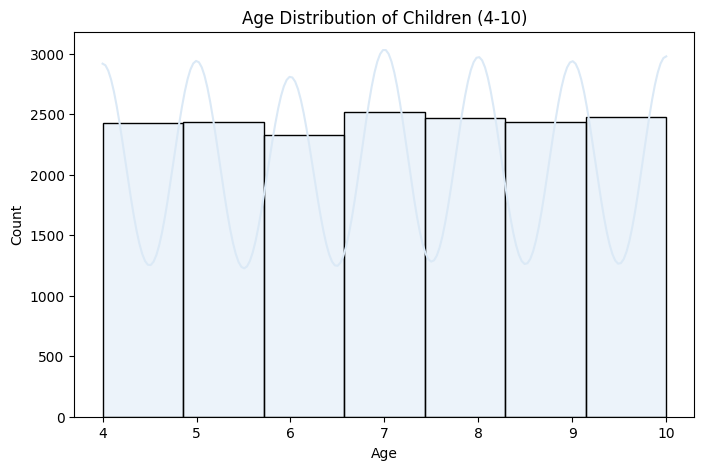

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=7, kde=True)
plt.title('Age Distribution of Children (4-10)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The majority of children in the dataset are aged 4-10, providing insight into the developmental stage at which nightmares occur most frequently

### Who Experiences Nightmares? by Age

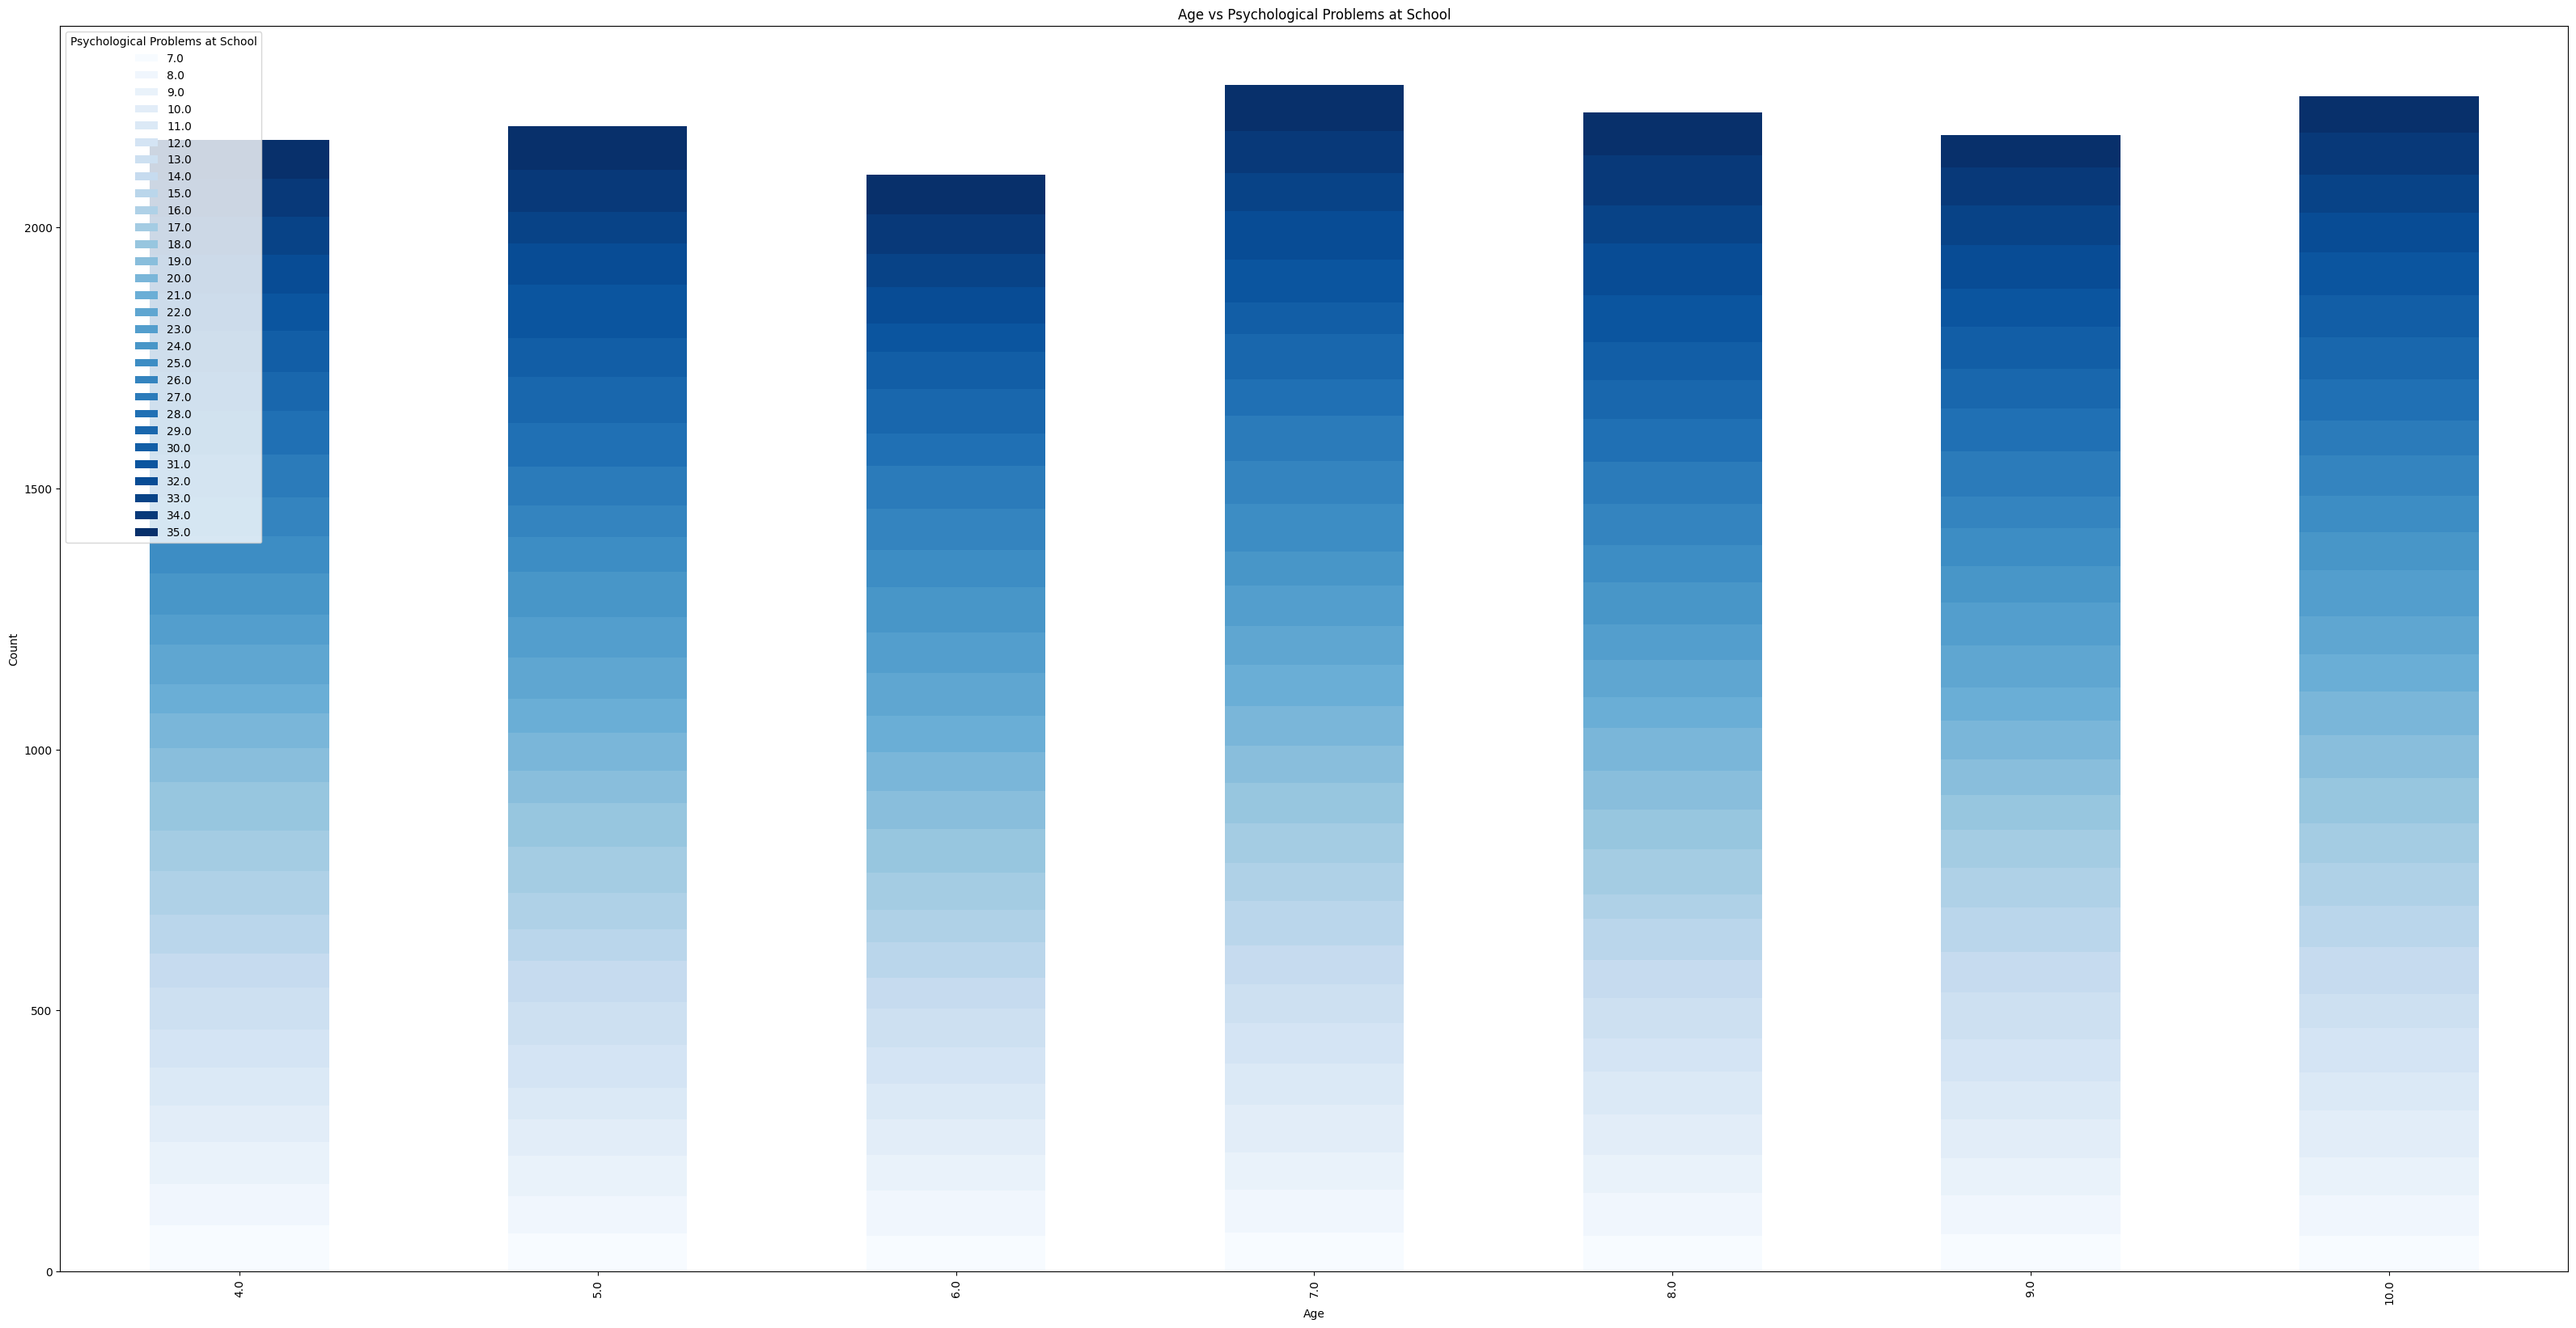

In [38]:
gender_psychological = pd.crosstab(df['Age'], df['Psychological Problems at School'])
gender_psychological.plot(kind='bar', stacked=True, figsize=(40,20), cmap='Blues')
plt.title('Age vs Psychological Problems at School')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

- Children ages 4-10 seem to report fewer psychological problems, but there is a noticeable increase in issues among children aged 7-10, suggesting age-related developmental challenges or a deeper connection between nightmares and school performance 

### Who Experiences Nightmares? by Gender

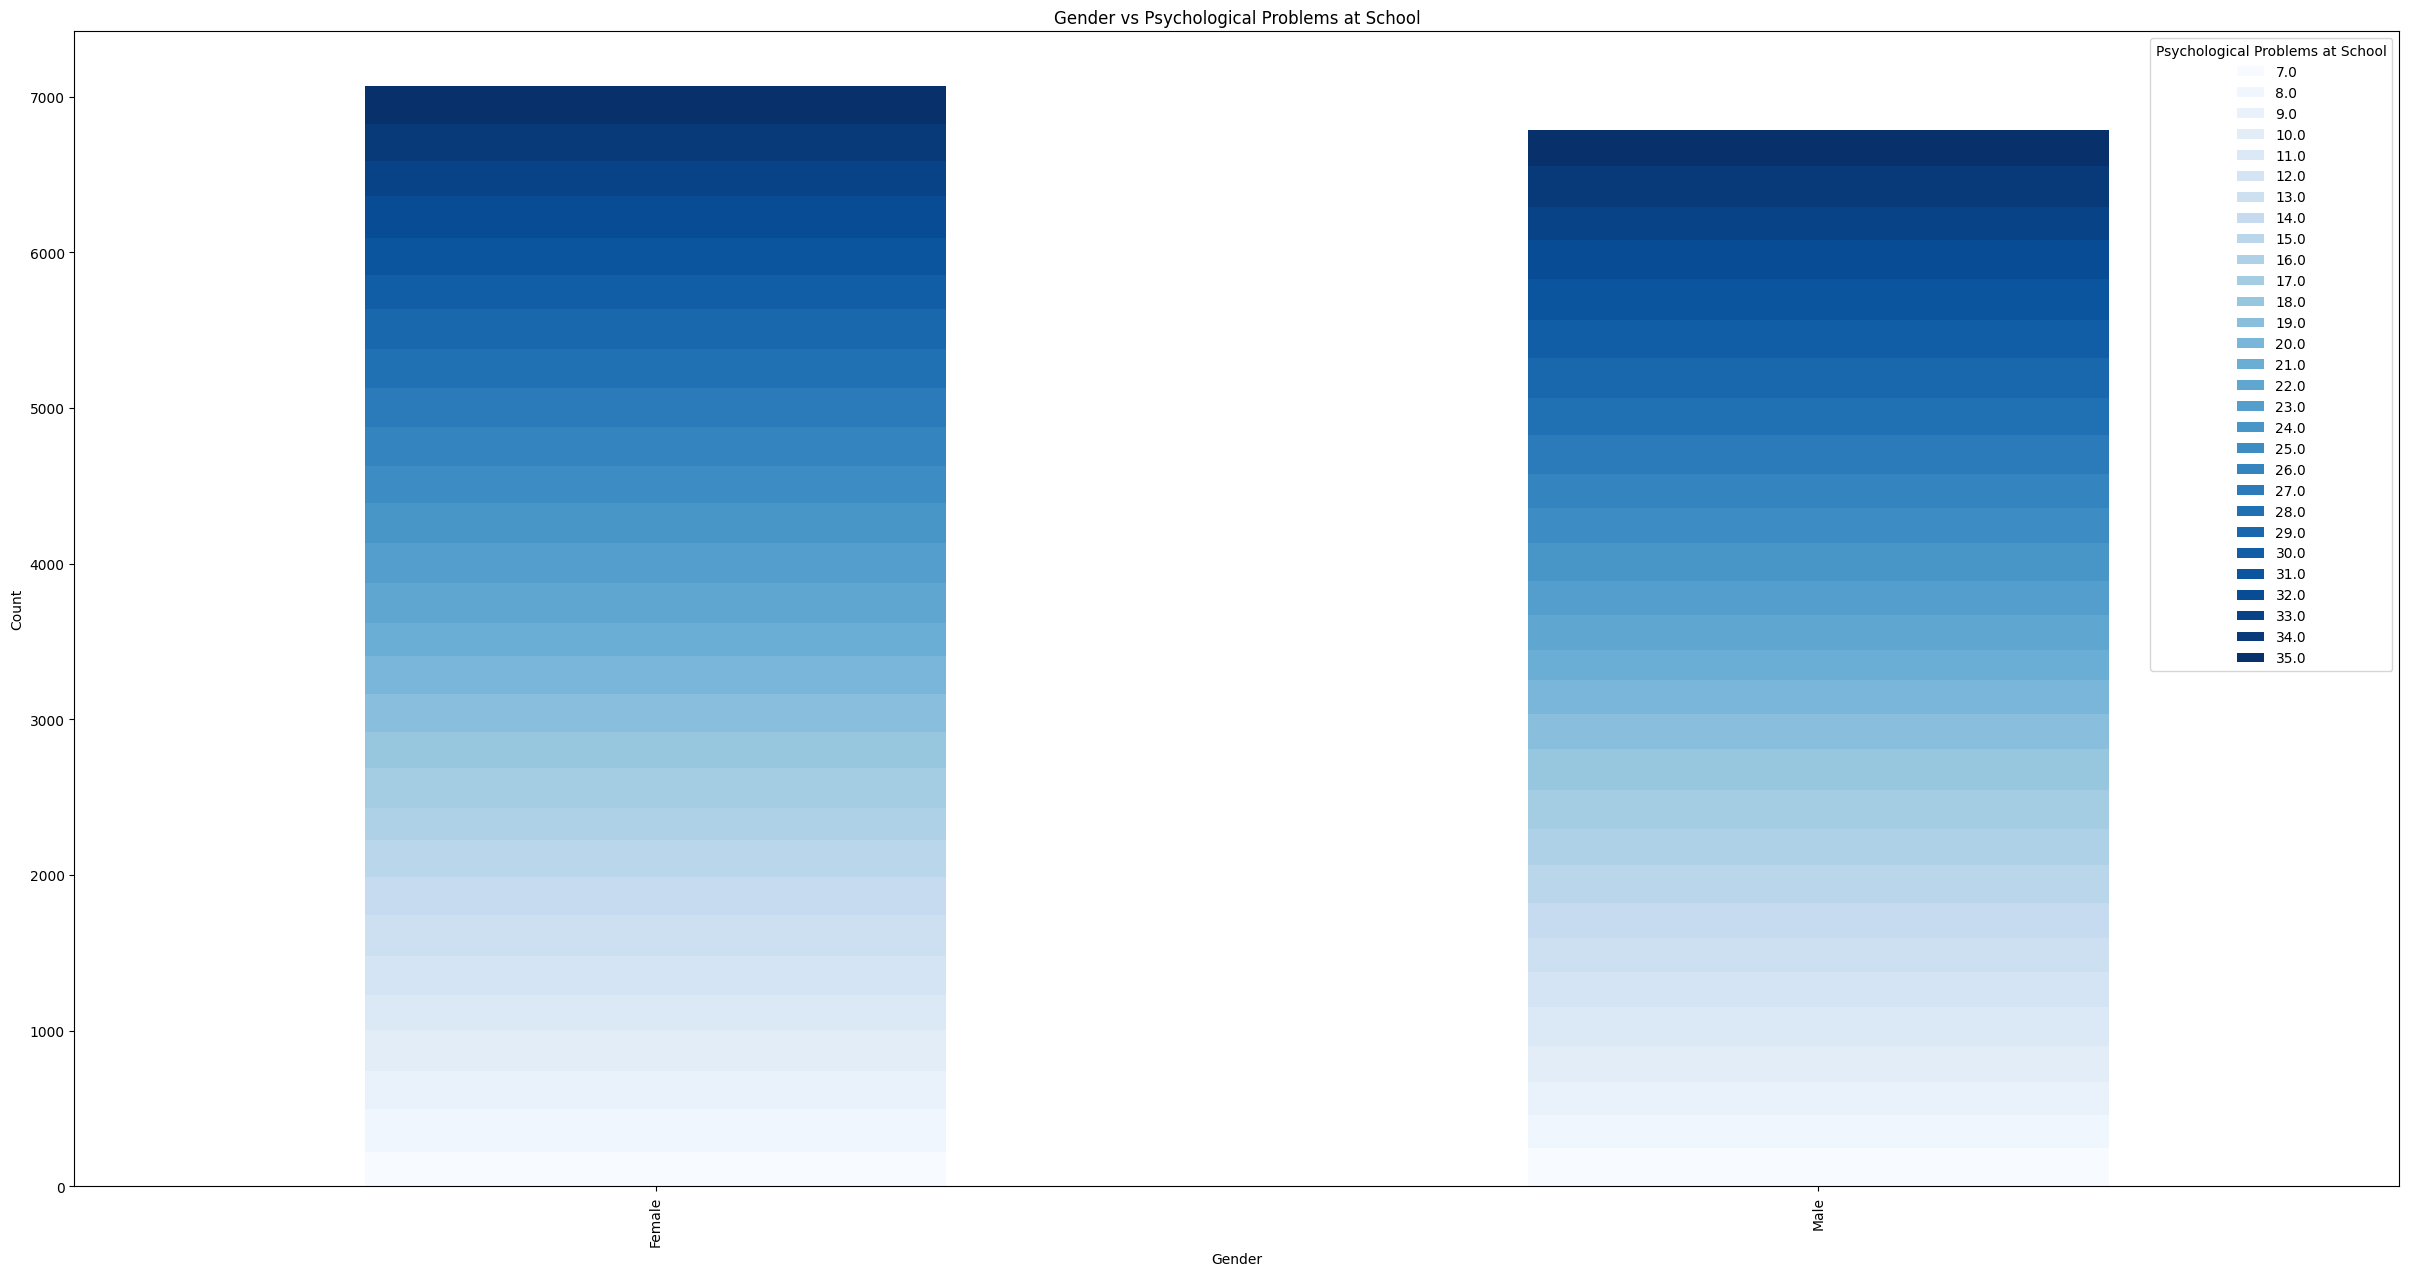

In [39]:
gender_psychological = pd.crosstab(df['Gender'], df['Psychological Problems at School'])
gender_psychological.plot(kind='bar', stacked=True, figsize=(30,15), cmap='Blues')
plt.title('Gender vs Psychological Problems at School')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

- This shows a higher frequency of nightmares among females. 
- Additionally, females seem to be more likely to report psychological issues at school, possibly linking nightmares to daytime behavior

### How Often Do Children Experience Nightmares?

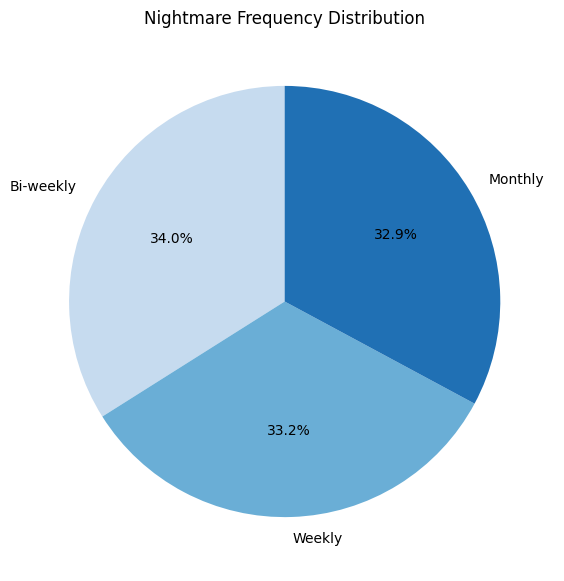

In [40]:
nightmare_freq = df['Nightmare Frequency'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(nightmare_freq, labels=nightmare_freq.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(nightmare_freq)))
plt.title('Nightmare Frequency Distribution')
plt.show()

- More children report having nightmares bi-weekly compared to other frequencies, highlighting a recurring pattern of distress

### What Are Children Dreaming About?

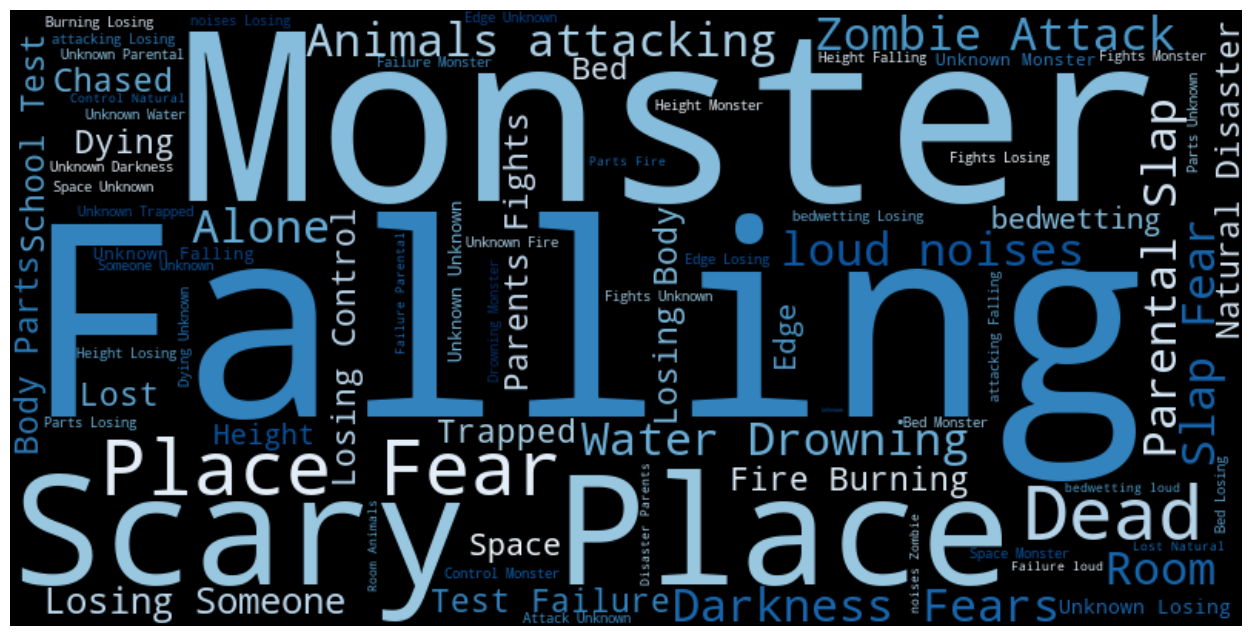

In [41]:
from wordcloud import WordCloud
from collections import Counter

words = ' '.join(df['Nightmare Content']).split()
common_words = Counter(words).most_common()
wordcloud = WordCloud(width=800, height=400, colormap= 'Blues').generate(' '.join(words))
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- The most common themes in nightmares are related to falling, monsters, and scary places, which may reflect underlying fears children face

### Relationship Between Nighmare Content and Psychological Issues

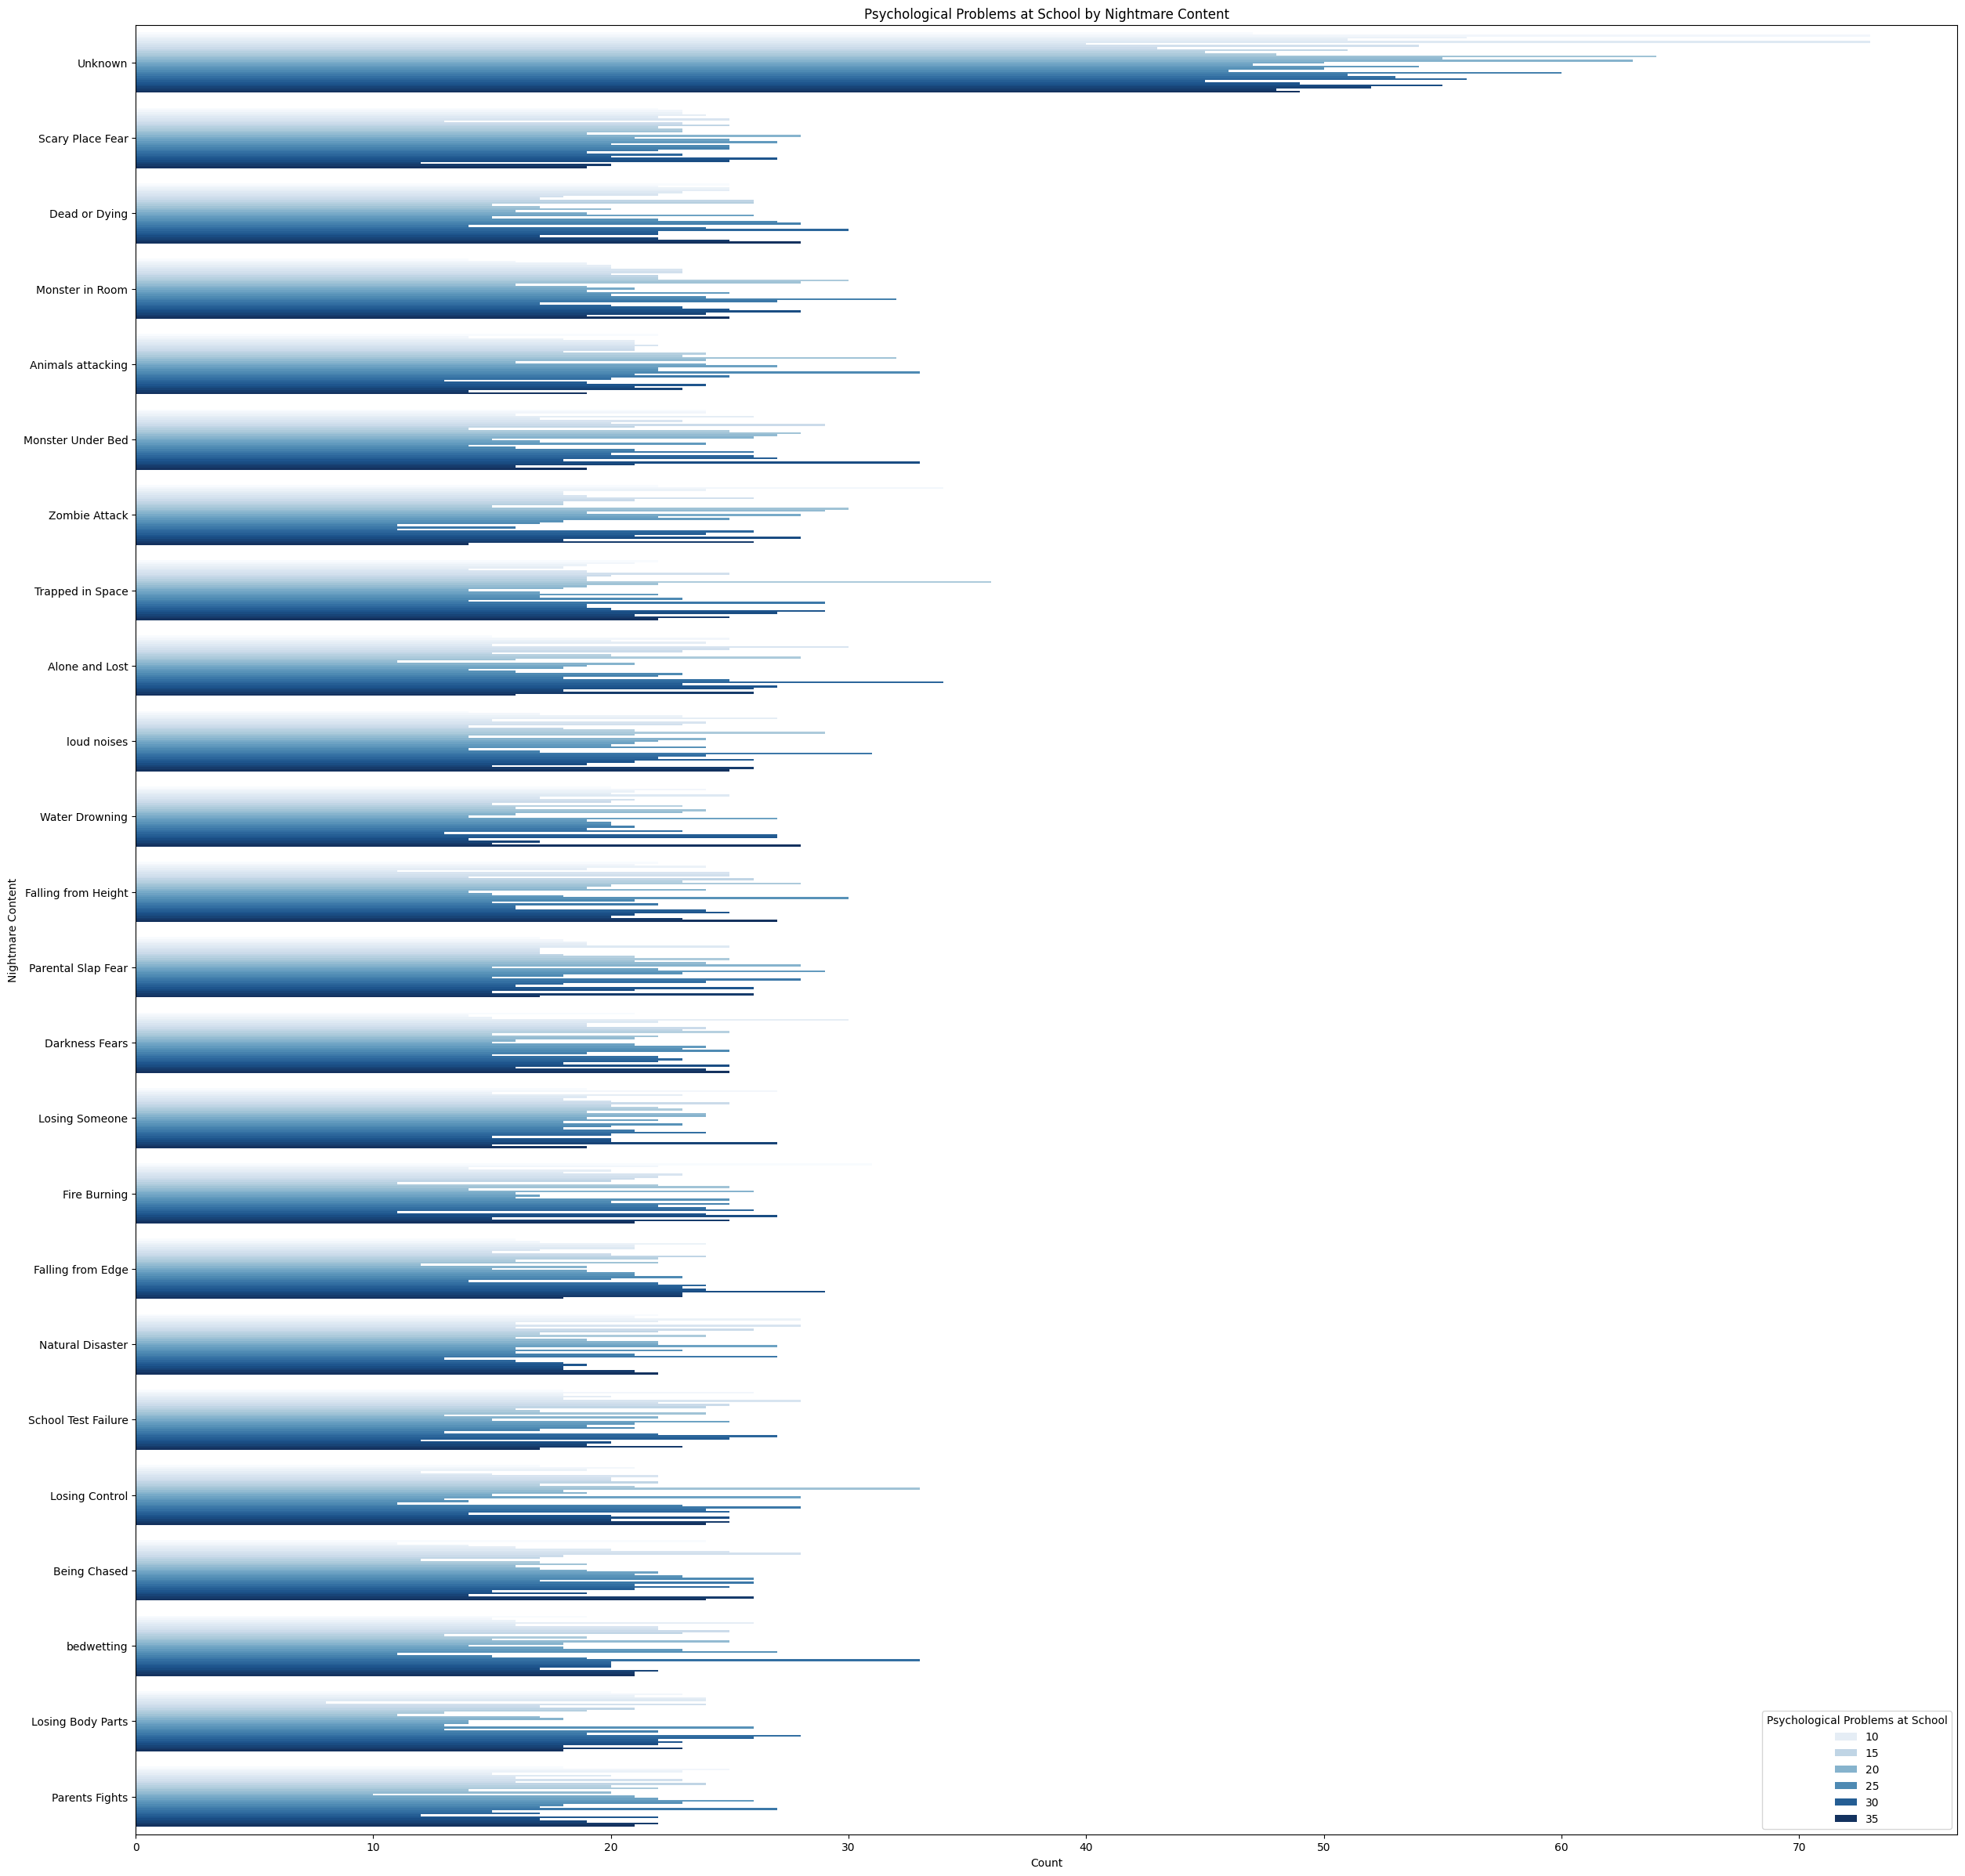

In [42]:
plt.figure(figsize=(30, 30))
sns.countplot(data=df, y='Nightmare Content', hue='Psychological Problems at School', order=df['Nightmare Content'].value_counts().index, palette='Blues')
plt.title('Psychological Problems at School by Nightmare Content')
plt.xlabel('Count')
plt.show()

- Nightmares that are Unknown, or involving monsters, falling, dead or dying, and scary places seem to have a stronger connection with psychological problems at school, highlighting the emotional impact of these fears

### Gender and Nightmare Content

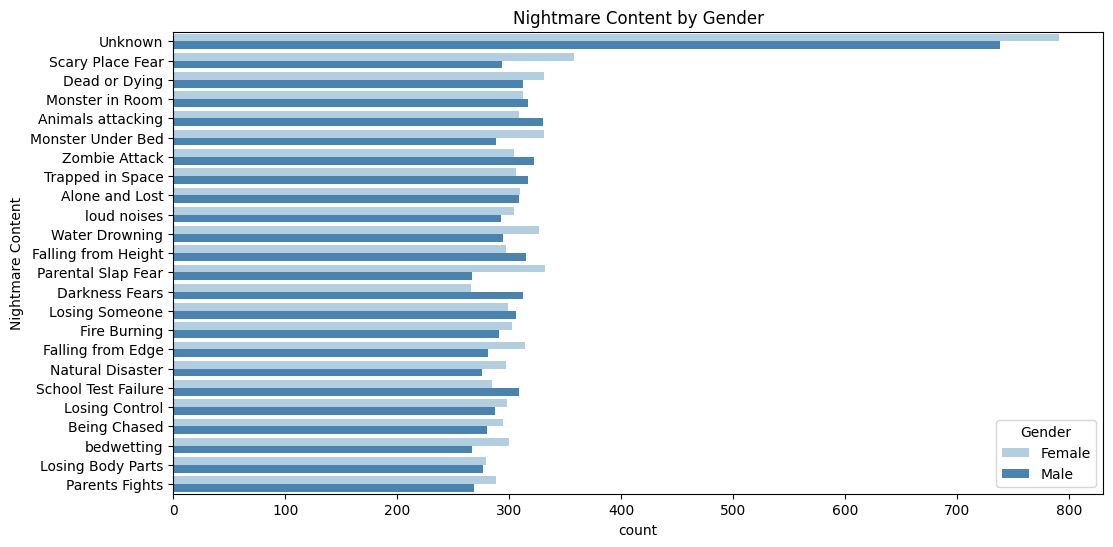

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Nightmare Content', hue='Gender', order=df['Nightmare Content'].value_counts().index, palette='Blues')
plt.title('Nightmare Content by Gender')
plt.show()

- Female children tend to experience more nightmares in general
- More Female children tend to experience nightmares of Unknown content, Scary places, and death
- Male children experience more nightmares of Animals Attacking, Zombies, Trapped in Space.

### Linking Recent Life Changes to Nightmares

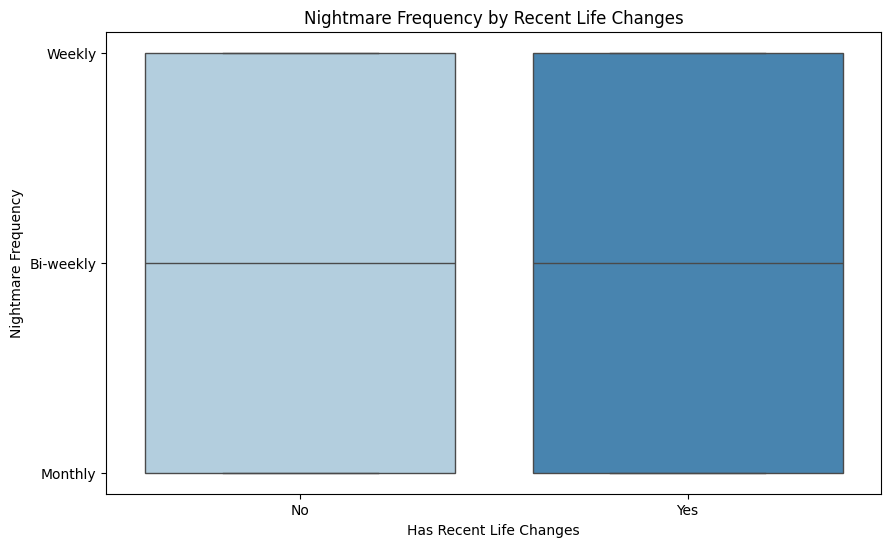

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Has Recent Life Changes', y='Nightmare Frequency', data=df, palette='Blues')
plt.title('Nightmare Frequency by Recent Life Changes')
plt.show()

- Children who have experienced recent life changes report more frequent nightmares, suggesting a potential emotional link

###  Impact of Irregular Sleep Patterns on Nightmare Frequency

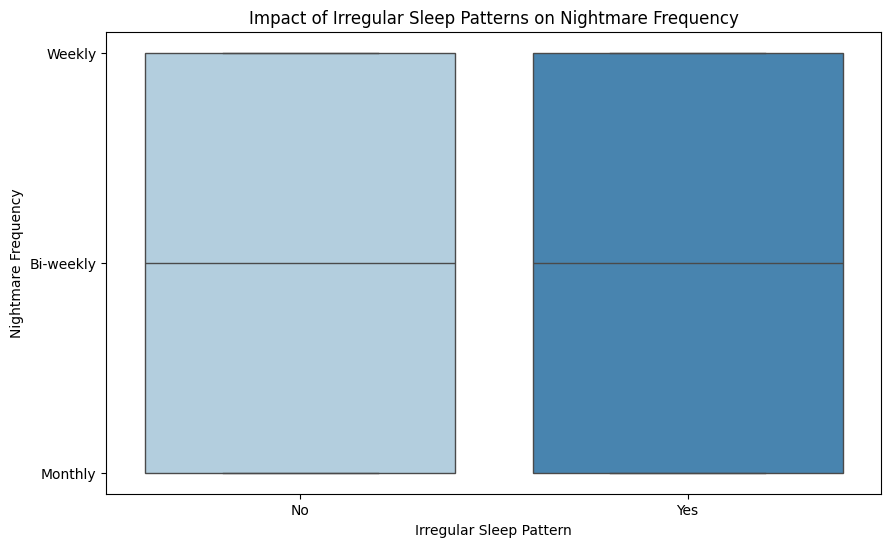

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Irregular Sleep Pattern', y='Nightmare Frequency', data=df, palette='Blues')
plt.title('Impact of Irregular Sleep Patterns on Nightmare Frequency')
plt.show()

- Children with irregular sleep patterns tend to report more frequent nightmares, supporting the idea that sleep disruptions are a major factor in the occurrence of nightmares

### Understanding Fear-Related Nightmares

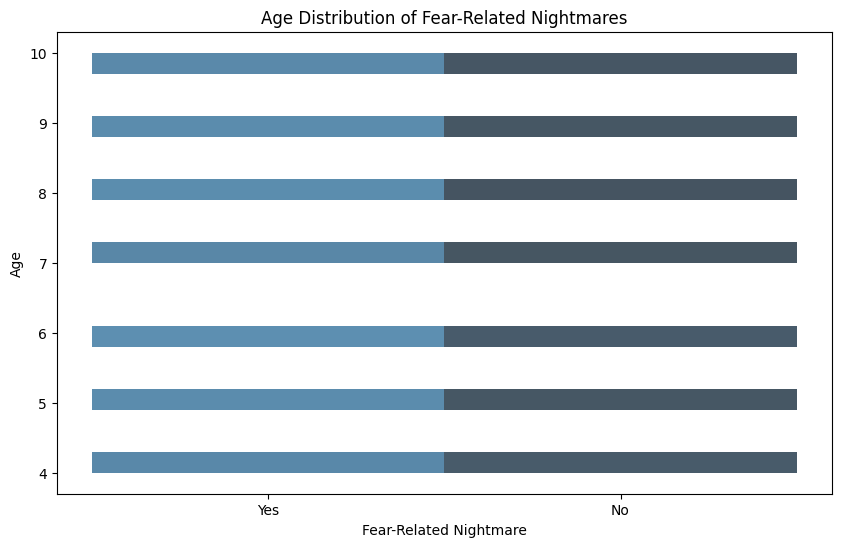

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fear-Related Nightmare', y='Age', data=df, palette='Blues')
plt.title('Age Distribution of Fear-Related Nightmares')
plt.show()

- Fear-related nightmares are experienced consistently across all age groups, with no significant variation in occurrence. Similarly, the number of children who do not experience fear-related nightmares remains fairly consistent across different age ranges.

### How Do Sleep Patterns Relate to Nightmares?

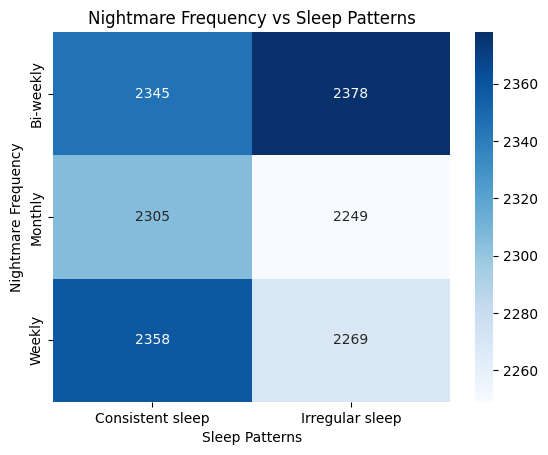

In [47]:

contingency = pd.crosstab(df['Nightmare Frequency'], df['Sleep Patterns'])
sns.heatmap(contingency, annot=True, cmap='Blues', fmt='d')
plt.title('Nightmare Frequency vs Sleep Patterns')
plt.xlabel('Sleep Patterns')
plt.ylabel('Nightmare Frequency')
plt.show()



- The chart shows that consistent sleep patterns are associated with higher absolute numbers for nightmare frequency across all categories (bi-weekly, monthly, and weekly)
- This trend can be explained by consistent sleep promoting higher chances of reaching REM sleep, the sleep phase where dreams and nightmares occur. Regular sleep patterns enhance sleep quality, potentially increasing the opportunity for vivid dreams or nightmares.
- While consistent sleep enables REM sleep and dreams, the root cause of nightmares is likely tied to external psychological and environmental factors, such as stress, fear, or recent life changes. These factors play a more significant role in triggering nightmares than sleep patterns alone.

### Sleep Environment and Nightmares

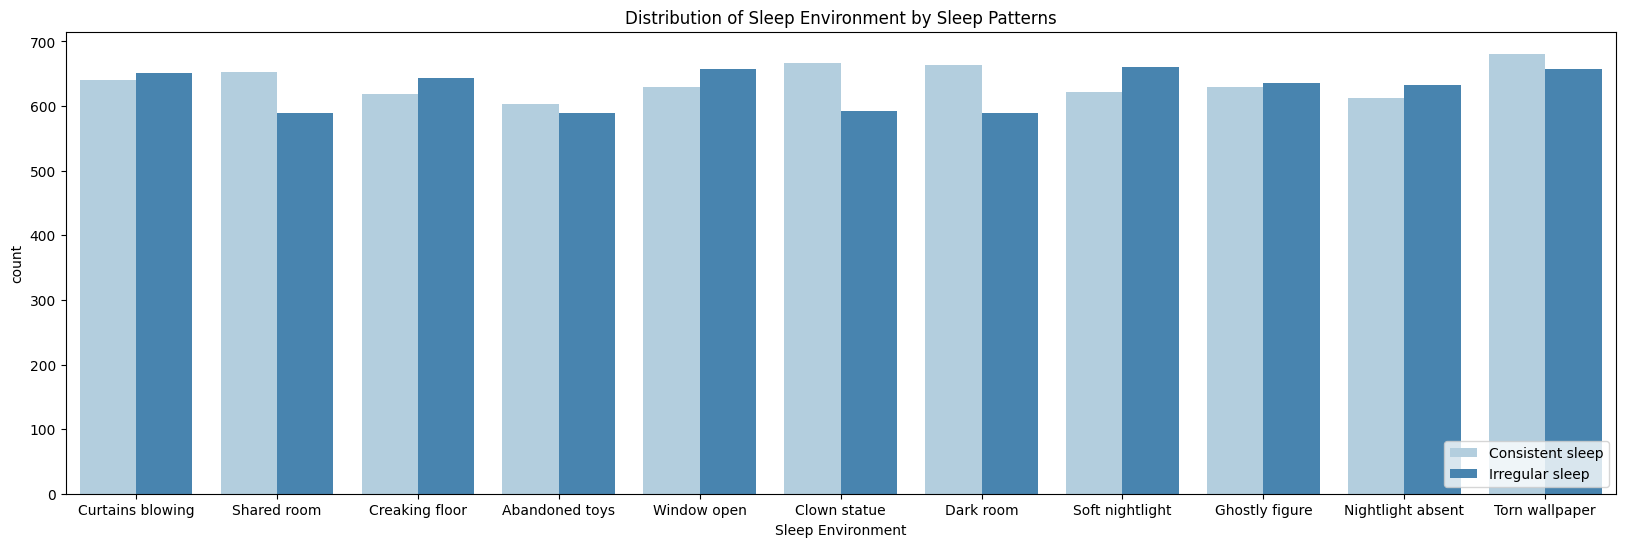

In [48]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Sleep Environment', hue='Sleep Patterns', palette='Blues')
plt.title('Distribution of Sleep Environment by Sleep Patterns')
plt.legend(loc='lower right')
plt.show()


- Children that sleep in enviornments that have noises and less lit rooms, tend to have more inconsistent sleep, but complete dark room, has consistent sleep
- Children that sleep in enviornments that have figures or statues also have irregular sleep
- Children that sleep in shared enviornments have signifcant consistent sleep
- This emphasizes the potential role of environmental factors in children's sleep quality

### Summary

This analysis highlights several factors that contribute to nightmares in children aged 4-10. Nightmares are more frequent in females and are often associated with psychological challenges at school, irregular sleep patterns, and recent life changes. Poor sleep hygiene, such as irregular sleep patterns and disruptive sleep environments, appears to exacerbate nightmares. Addressing these issues, including improving sleep routines and addressing emotional stressors, could help mitigate the frequency and impact of nightmares on children's development and well-being.

Overall, this offers a comprehensive look at the patterns and relationships underlying nightmares in young children, suggesting that both psychological and environmental factors play significant roles.